In [2]:
import numpy as np
import matplotlib.pyplot as plt

exp_duration = 2
time = np.arange(0, exp_duration, 0.001) 
n_time_points = len(time)

Ahora se crearán dos tipos de estímulos: Señal cuadrada $f(t)$ y Señal alpha $g(t)$. Éstas están definidas de la siguiente manera

Estímulo cuadrado:

$
f(t) =
\left\{
	\begin{array}{ll}
		A  & \mbox{si } t \in [t_1,t_2] \\
		0 &  o.c
	\end{array}
\right.
$

Señal Alpha:

$
g(t) =
\left\{
	\begin{array}{ll}
		\frac{g_m(t-t_{on})}{\tau}e^{({-\frac{t-t_{on}}{\tau}})} & \mbox{si } t \geq t_{on} \\
		0 &  o.c
	\end{array}
\right.$

Creación de estímulo cuadrado

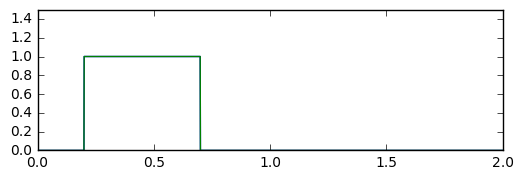

In [13]:
light_stimuli = np.zeros(n_time_points)

t_start = 200  #ms
duration = 500 #ms
t_end = t_start + duration
amplitude = 1
light_stimuli[t_start:t_end] = amplitude

plt.plot()
plt.plot(time,light_stimuli)
plt.ylim(0,1.5)
plt.show()

Creación Alpha Synapse

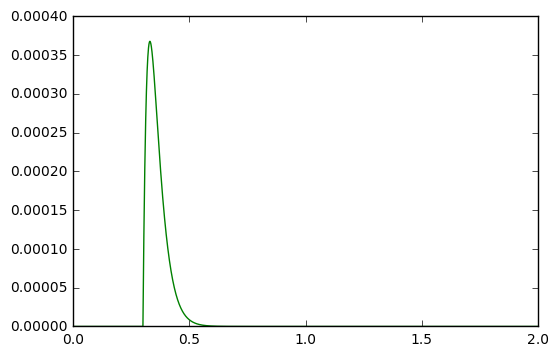

In [14]:
alpha_syn = np.zeros(n_time_points)
gmin = 1e-04 #siemens
gmax = 1e-03
t_onset = 300 #ms
tau = 30. #ms

for t in range(t_onset,n_time_points):
    aux = (t-t_onset)/tau
    alpha_syn[t] =gmax*(aux)*np.exp(-(aux))
    
plt.plot(212)
plt.plot(time,alpha_syn)
plt.ylim(0,4e-04)
plt.show()

Ahora, la convolución entre ambas señales

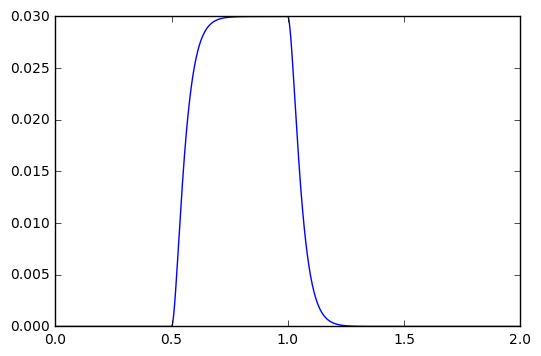

In [22]:
convolution = np.convolve(light_stimuli, alpha_syn)
new_time = np.arange(0, len(convolution)/1000., 0.001)

plt.plot()
plt.plot(new_time,convolution)
plt.xlim(0,2)
plt.show()

Sin embargo, al calcular la convolución a mano, se obtiene lo siguiente:

$
\begin{array}{ll}
h(t)&=  f(t) * g(t) \\
& = Ag_{m} \int_{-\infty}^{\infty} \frac{((t-T)-t_{on})}{\tau}e^{({-\frac{(t-T)-t_{on}}{\tau}})} dT\\
& = Ag_{m}\tau \int_{-\infty}^{\infty} -xe^{-x}dx\\
& = Ag_{m}\tau[1+x]e^{-x}\\
& = Ag_{m}\tau[(\frac{(t-t_2-t_{on})}{\tau} + 1)e^{({-\frac{(t-t_2-t_{on})}{\tau}})}) - (\frac{(t-t_1-t_{on})}{\tau} + 1)e^{({-\frac{(t-t_1-t_{on})}{\tau}})})]
\end{array}
$

Y en código

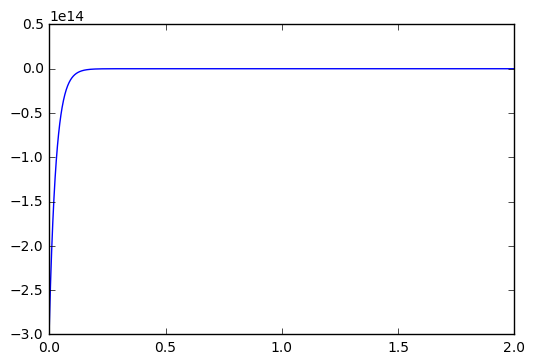

In [27]:
hand_convolution = np.zeros(n_time_points)
for t in range(n_time_points):
        K = amplitude*gmax*tau
        t_a = ((t - t_start - t_onset)/tau)
        t_b = ((t - t_end - t_onset)/tau)
        hand_convolution[t] = K*((np.exp(-t_b)*(t_b + 1)) - (np.exp(-t_a)*(t_a + 1)))

plt.plot(time, hand_convolution)
plt.show()

En resumen, las convolución analítica no es identica a la convolución numérica

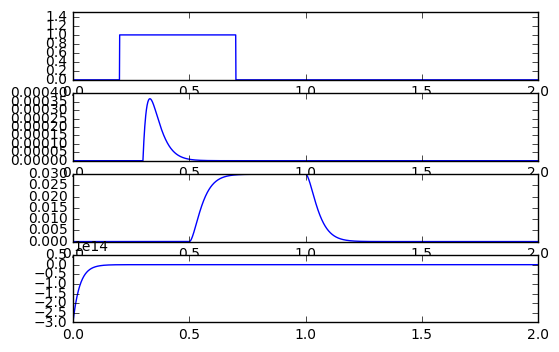

In [30]:
plt.subplot(411)
plt.plot(time,light_stimuli)
plt.ylim(0,1.5)
plt.subplot(412)
plt.plot(time,alpha_syn)
plt.ylim(0,4e-04)
plt.subplot(413)
plt.plot(new_time, convolution)
plt.xlim(0,2)
plt.subplot(414)
plt.plot(time, hand_convolution)
plt.show()